# Hackathon-Shinkansen Travel Experience


# Context
This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. 

The on-time performance of the trains along with passenger information is published in a file named **‘Traveldata_train.csv’.**  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled **‘Surveydata_train.csv’.**
In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled **‘Overall_Experience’.** 


# Objective
- Predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.
 
- Determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. 



# Data Description

**Travel Data:**

- **ID** :	The unique ID of the passenger ->	Continuous value like 98800001, 98800002, etc.
- **Gender**:	The gender of the passenger -> 	"Male Female"
- **Customer_Type**:	Loyalty type of the passenger ->	"Loyal Customer Disloyal Customer"
- **Age**:	The age of the passenger ->	Continuous values like 48, 52, 9, etc.
- **Type_Travel**:	Purpose of travel for the passenger ->	"Personal Travel Business Travel"
- **Travel_Class**:	The train class that the passenger traveled in ->	"Business Eco"
- **Travel_Distance**:	The distance traveled by the passenger -> Continuous values like 272, 780, 853, etc.
- **Departure_Delay_in_Mins**:	The delay (in minutes) in train departure -> Continuous values like 9, 15, 13, etc.
- **Arrival_Delay_in_Min**s:	The delay (in minutes) in train arrival -> Continuous values like 0, 15, 18, etc.

**Survey Data:**

- **Platform_Location**:How convenient the location of the platform is for the passenger->"Very Inconvenient,Inconvenient,Needs Improvement, Manageable,Convenient, Very Convenient"
- **Seat_Class**:	"The type of the seat class in the train; Green Car seats are usually more spacious and comfortable than  ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car."->	"Ordinary, Green Car"
- **Overall_Experience**:	The overall experience of the passenger ->	"1 - Satisfied 0 - Not Satisfied"
- **Seat_Comfort**:	The comfort level of the seat for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Arrival_Time_Convenient**:	How convenient the arrival time of the train is for the passenger->	"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Catering**:	How convenient the catering service is for the passenger->	"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Onboard_Wifi_Service**:	The quality of the onboard Wi-Fi service for the passenger->"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"	
- **Onboard_Entertainment**:	The quality of the onboard entertainment for the passenger-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"	
- **Online_Support**:	The quality of the online support for the passenger	-> "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Ease_of_Online_Booking**:	The ease of online booking for the passenger ->"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Onboard_Service**:	The quality of the onboard service for the passenger->	"Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Legroom**:	Legroom is the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it. This variable describes the convenience of the legroom provided for the passenger	->  "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Baggage_Handling**:	The convenience of baggage handling for the passenger ->	 "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **CheckIn_Service**:	The convenience of the check-in service for the passenger->	 "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Cleanliness**:	The passenger's view of the cleanliness of the service->  "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"
- **Online_Boarding**:	The convenience of the online boarding process for the passenger "Extremely Poor,Poor,Needs Improvement,Acceptable,Good,Excellent"

  *1. The categories of the ordinal variables in the above dataset are in the same order they are specified in the Column Value Examples. For example: For the Platform_Location column, the order would be Very Inconvenient < Inconvenient < Needs Improvement < Manageable < Convenient < Very Convenient*		




# Importing modules

In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#skipped the model that will be determine later 

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

# Reading the travel and survey dataset

In [18]:
travel_train = pd.read_csv("Traveldata_train.csv")
travel_test = pd.read_csv("Traveldata_test.csv")
survey_train = pd.read_csv("Surveydata_train.csv")
survey_test = pd.read_csv("Surveydata_test.csv")

# Checking the head and tail of the travel datase

In [7]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [8]:
travel_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


# Checking the head and tail of the survey datase

In [9]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [10]:
survey_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


# Checking shape of the travel and survey dataset

In [11]:
travel_train.shape

(94379, 9)

In [12]:
survey_train.shape

(94379, 17)

# Checking describe() and info() of the travel dataset

In [13]:
travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [14]:
travel_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


There seems to be missing values on the Gender, Customer_Type, Age, Type_Travel, Departure_Delay_in_Mins, and Arrvial_Delay_in_Mins

# Merge dataset

In [39]:
data = survey_train.merge(travel_train,on="ID",right_index=False,left_index=False)
data_test = survey_test.merge(travel_test,on="ID",right_index=False,left_index=False)

In [40]:
data.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [41]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Type_Travel,9.78
Customer_Type,9.48
Arrival_Time_Convenient,9.46
Catering,9.26
Onboard_Service,8.05
Arrival_Delay_in_Mins,0.38
Baggage_Handling,0.15
Online_Support,0.10
Legroom,0.10
Ease_of_Online_Booking,0.08


In [42]:
data.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

# Data Visualization

In [43]:
cat_cols=['Overall_Experience','Seat_Comfort','Seat_Class',
       'Arrival_Time_Convenient', 'Catering','Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
       'CheckIn_Service', 'Cleanliness', 'Online_Boarding','Gender','Customer_Type','Type_Travel','Travel_Class']

num_cols=['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins' ]



In [44]:
# Mean of numerical variables grouped by attrition
data.groupby(['Overall_Experience'])[num_cols].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,37.49018,2025.826088,17.738600,18.392374
1,41.01968,1939.962650,12.083107,12.196763


In [45]:
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*50)

1    51593
0    42786
Name: Overall_Experience, dtype: int64
--------------------------------------------------
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
--------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------------
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64
--------------------------------------------------
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64
--------------------------------------------------
Manageable           24

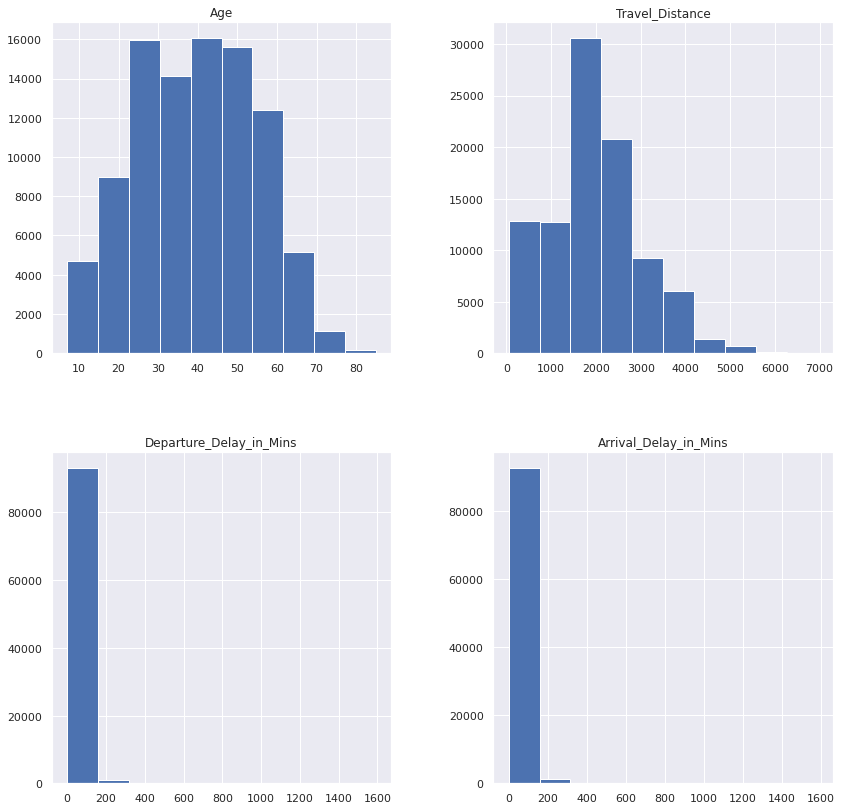

In [46]:
data[num_cols].hist(figsize=(14,14))
plt.show()

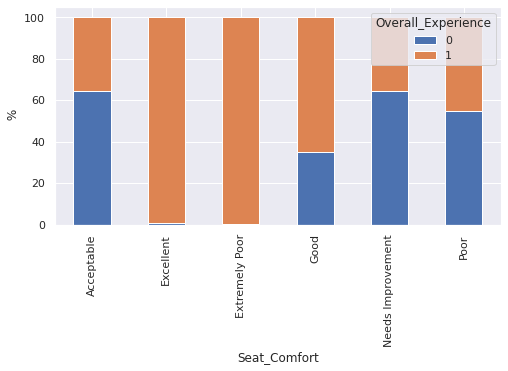

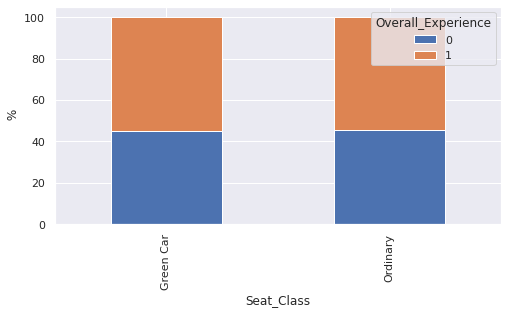

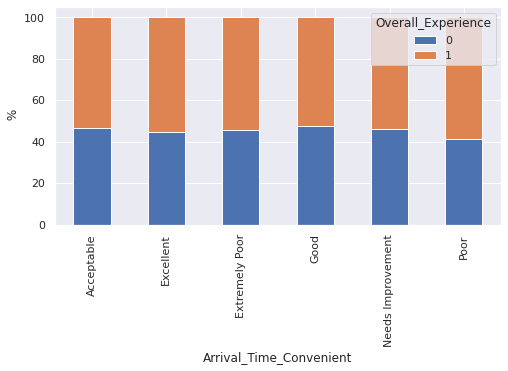

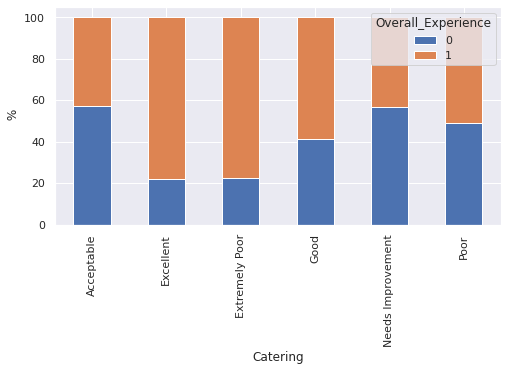

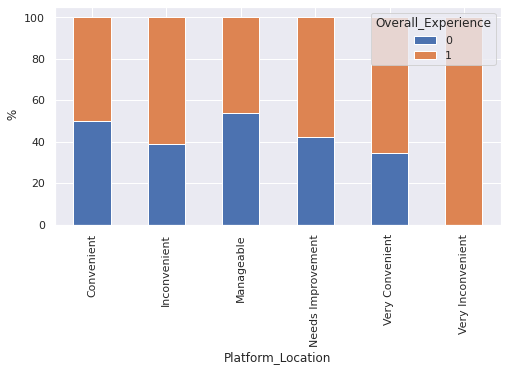

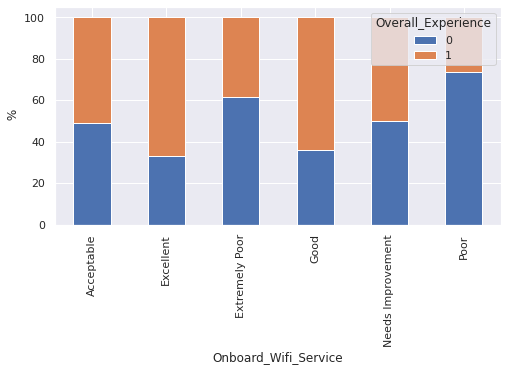

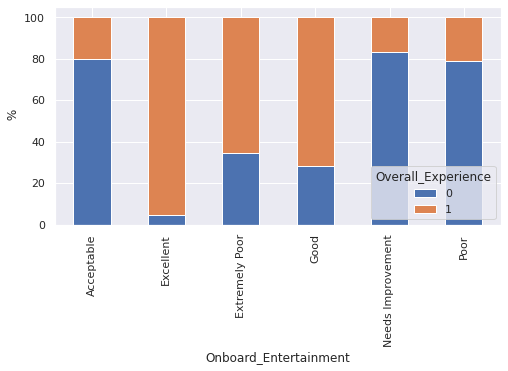

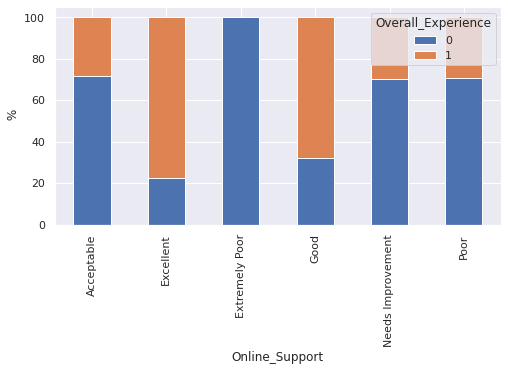

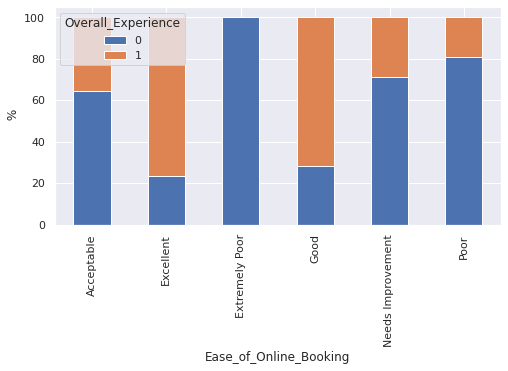

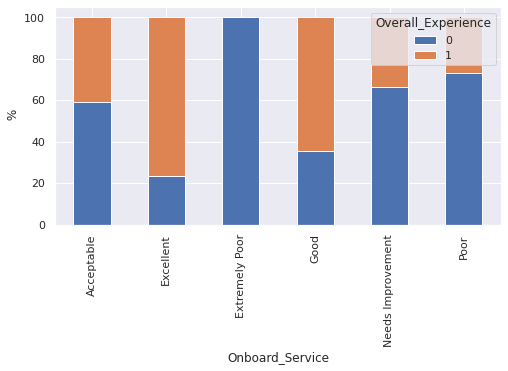

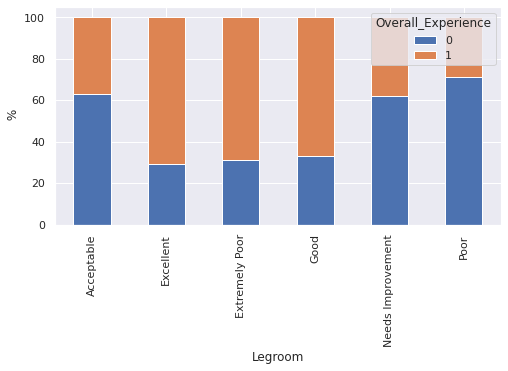

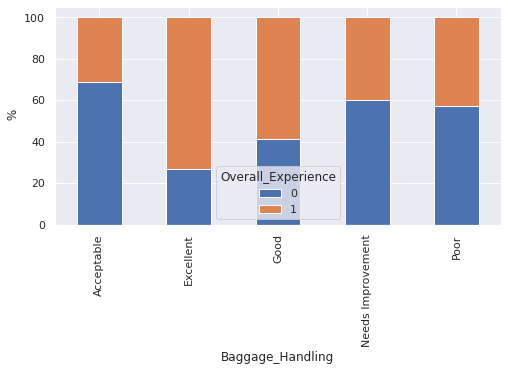

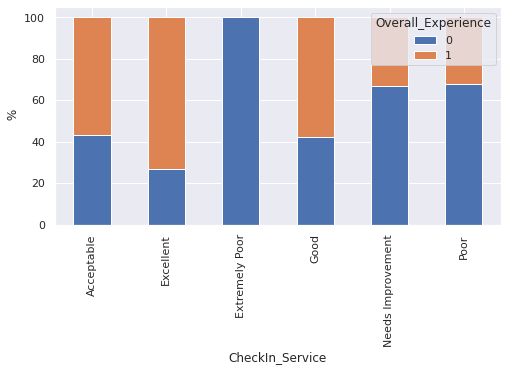

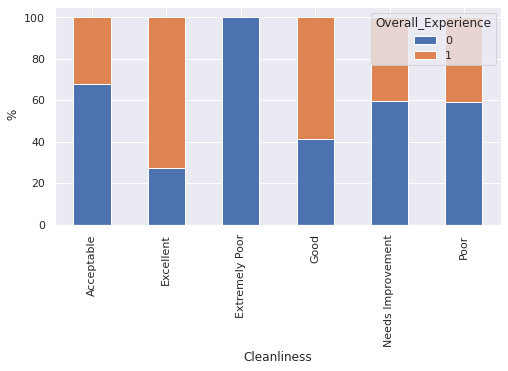

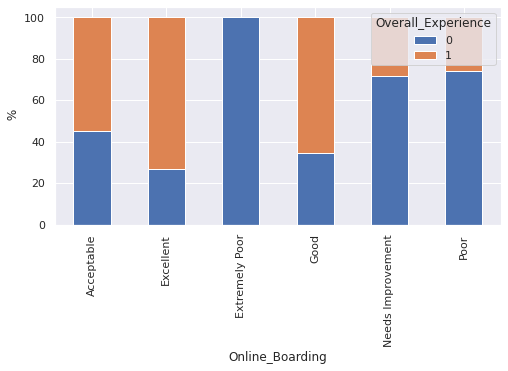

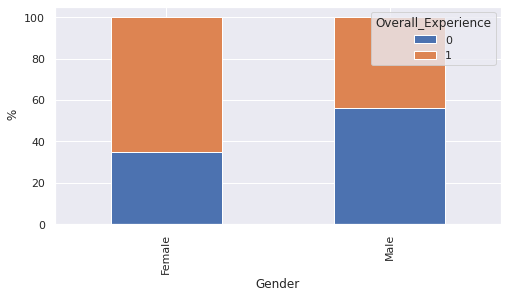

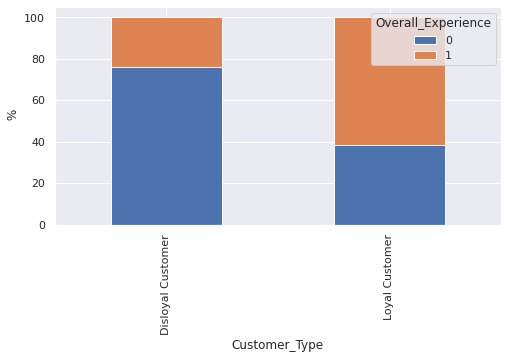

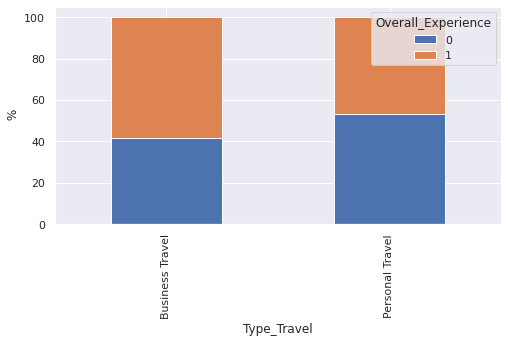

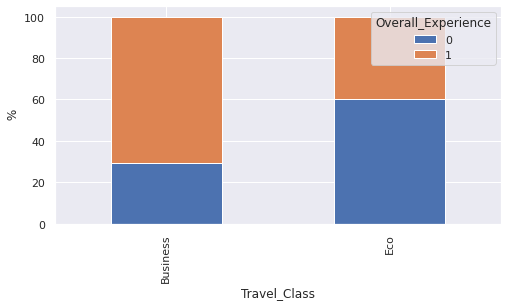

In [47]:
for i in cat_cols:
    if i!='Overall_Experience':
        (pd.crosstab(data[i],data['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel(' %')

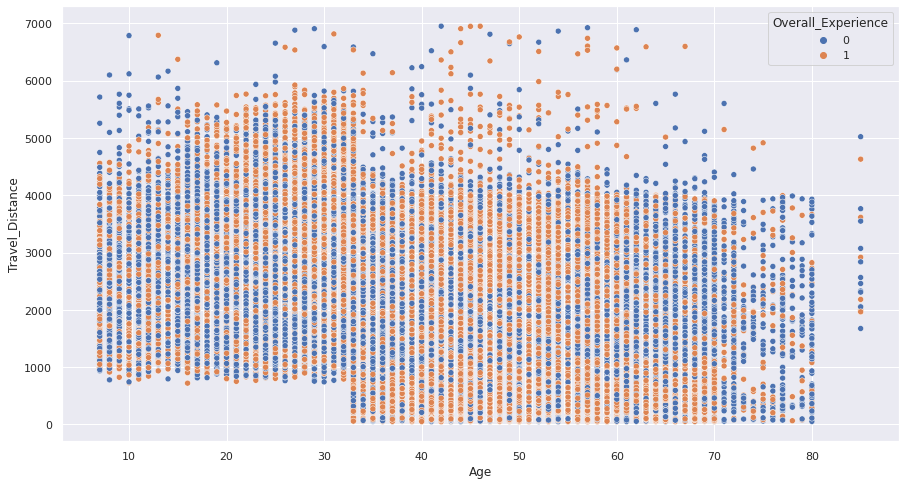

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, 
           x='Age', 
           y='Travel_Distance',    hue='Overall_Experience');

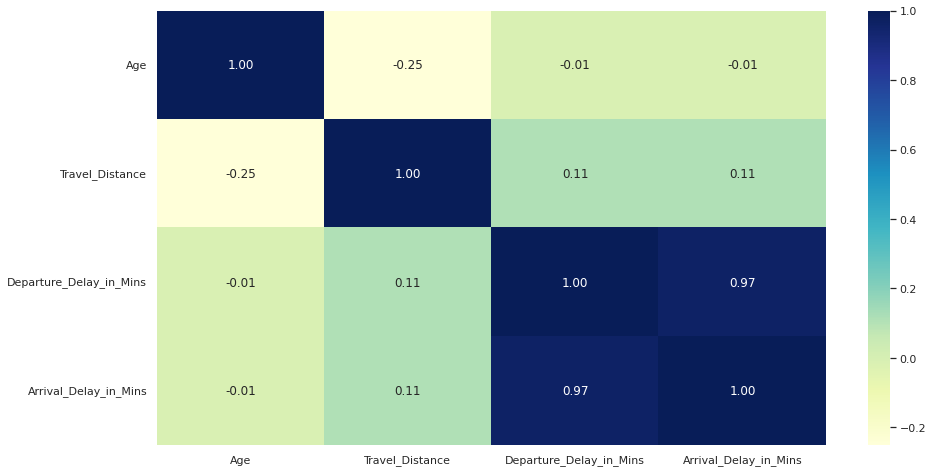

In [49]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

# Cleaning Dataset


In [50]:
for cols in data.columns:
    if data[cols].dtype == 'object':
        data[cols].fillna(data[cols].mode()[0],inplace=True)
    if data[cols].dtype == 'float64':
        data[cols].fillna(data[cols].mean(),inplace=True)

In [131]:
for cols in data_test.columns:
    if data_test[cols].dtype == 'object':
        data_test[cols].fillna(data_test[cols].mode()[0],inplace=True)
    if data_test[cols].dtype == 'float64':
        data_test[cols].fillna(data_test[cols].mean(),inplace=True)

In [52]:
for i in cat_cols:
    data[i]=np.where(data[i] =='Extremely Poor', 0, data[i])
    data[i]=np.where(data[i] =='Poor', 1, data[i])
    data[i]=np.where(data[i] =='Needs Improvement', 2, data[i])
    data[i]=np.where(data[i] =='Acceptable', 3, data[i])
    data[i]=np.where(data[i] =='Good', 4, data[i])
    data[i]=np.where(data[i] =='Excellent', 5, data[i])
    
data['Platform_Location']=np.where( data['Platform_Location'] =='Very Inconvenient', 0,  data['Platform_Location'])
data['Platform_Location']=np.where( data['Platform_Location'] =='Inconvenient', 1,  data['Platform_Location'])
data['Platform_Location']=np.where( data['Platform_Location'] =='Need Improvement', 2,  data['Platform_Location'])
data['Platform_Location']=np.where( data['Platform_Location'] =='Manageable', 3,  data['Platform_Location'])
data['Platform_Location']=np.where( data['Platform_Location'] =='Convenient', 4,  data['Platform_Location'])
data['Platform_Location']=np.where( data['Platform_Location'] =='Very Convenient', 5, data['Platform_Location'])

In [106]:
for i in cat_cols[1:]:
    data_test[i]=np.where(data_test[i] =='Extremely Poor', 0, data_test[i])
    data_test[i]=np.where(data_test[i] =='Poor', 1, data_test[i])
    data_test[i]=np.where(data_test[i] =='Needs Improvement', 2, data_test[i])
    data_test[i]=np.where(data_test[i] =='Acceptable', 3, data_test[i])
    data_test[i]=np.where(data_test[i] =='Good', 4, data_test[i])
    data_test[i]=np.where(data_test[i] =='Excellent', 5, data_test[i])
    
data_test['Platform_Location']=np.where( data_test['Platform_Location'] =='Very Inconvenient', 0,  data_test['Platform_Location'])
data_test['Platform_Location']=np.where( data_test['Platform_Location'] =='Inconvenient', 1,  data_test['Platform_Location'])
data_test['Platform_Location']=np.where( data_test['Platform_Location'] =='Need Improvement', 2,  data_test['Platform_Location'])
data_test['Platform_Location']=np.where( data_test['Platform_Location'] =='Manageable', 3,  data_test['Platform_Location'])
data_test['Platform_Location']=np.where( data_test['Platform_Location'] =='Convenient', 4,  data_test['Platform_Location'])
data_test['Platform_Location']=np.where( data_test['Platform_Location'] =='Very Convenient', 5, data_test['Platform_Location'])

In [53]:
data_d1 = pd.concat([data, pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)
data_d1 = data_d1.drop(columns = 'Gender')
data_d2 = pd.concat([data_d1, pd.get_dummies(data_d1['Customer_Type'], prefix = 'Customer_Type')], axis=1)
data_d2 = data_d2.drop(columns = 'Customer_Type')
data_d3 = pd.concat([data_d2, pd.get_dummies(data_d2['Travel_Class'], prefix = 'Travel_Class')], axis=1)
data_d3 = data_d3.drop(columns = 'Travel_Class')
data_d4 = pd.concat([data_d3, pd.get_dummies(data_d2['Seat_Class'], prefix = 'Seat_Class')], axis=1)
data_d4 = data_d4.drop(columns = 'Seat_Class')
data_d5 = pd.concat([data_d4, pd.get_dummies(data_d2['Type_Travel'], prefix = 'Type_Travel')], axis=1)
data_d5 = data_d5.drop(columns = 'Type_Travel')

In [132]:
data_test_d1 = pd.concat([data_test, pd.get_dummies(data_test['Gender'], prefix = 'Gender')], axis=1)
data_test_d1 = data_test_d1.drop(columns = 'Gender')
data_test_d2 = pd.concat([data_test_d1, pd.get_dummies(data_test_d1['Customer_Type'], prefix = 'Customer_Type')], axis=1)
data_test_d2 = data_test_d2.drop(columns = 'Customer_Type')
data_test_d3 = pd.concat([data_test_d2, pd.get_dummies(data_test_d2['Travel_Class'], prefix = 'Travel_Class')], axis=1)
data_test_d3 = data_test_d3.drop(columns = 'Travel_Class')
data_test_d4 = pd.concat([data_test_d3, pd.get_dummies(data_test_d2['Seat_Class'], prefix = 'Seat_Class')], axis=1)
data_test_d4 = data_test_d4.drop(columns = 'Seat_Class')
data_test_d5 = pd.concat([data_test_d4, pd.get_dummies(data_test_d2['Type_Travel'], prefix = 'Type_Travel')], axis=1)
data_test_d5 = data_test_d5.drop(columns = 'Type_Travel')

In [56]:
data_train=data_d5.drop('ID',axis=1)
data_train.head()


,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Travel_Class_Business,Travel_Class_Eco,Seat_Class_Green Car,Seat_Class_Ordinary,Type_Travel_Business Travel,Type_Travel_Personal Travel
0,0,2,5,5,5,4,2,3,2,2,...,1,0,0,1,1,0,1,0,1,0
1,0,1,5,1,2,4,1,4,4,5,...,0,1,0,1,0,1,0,1,0,1
2,1,2,2,2,2,2,4,5,5,5,...,1,0,0,1,1,0,1,0,1,0
3,0,3,2,3,2,3,2,3,3,3,...,1,0,0,1,1,0,0,1,1,0
4,1,3,3,3,3,2,4,5,4,4,...,1,0,0,1,1,0,0,1,1,0


In [133]:
data_test_final = data_test_d5
data_test_final.head()
data_test_final.isnull().sum()

ID                                 0
Seat_Comfort                       0
Arrival_Time_Convenient            0
Catering                           0
Platform_Location                  0
Onboard_Wifi_Service               0
Onboard_Entertainment              0
Online_Support                     0
Ease_of_Online_Booking             0
Onboard_Service                    0
Legroom                            0
Baggage_Handling                   0
CheckIn_Service                    0
Cleanliness                        0
Online_Boarding                    0
Age                                0
Travel_Distance                    0
Departure_Delay_in_Mins            0
Arrival_Delay_in_Mins              0
Gender_Female                      0
Gender_Male                        0
Customer_Type_Disloyal Customer    0
Customer_Type_Loyal Customer       0
Travel_Class_Business              0
Travel_Class_Eco                   0
Seat_Class_Green Car               0
Seat_Class_Ordinary                0
T

# train_test_split

In [68]:
Y = data_train.Overall_Experience
X = data_train.drop('Overall_Experience',axis=1)
X.shape

(94379, 28)

# Building NN Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [70]:
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(28,)))
model_1.add(Dropout(0.3))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [71]:
model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1856      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,209
Trainable params: 4,209
Non-traina

In [72]:
scaler = StandardScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [73]:
X_train_normalized

array([[ 0.1181834 ,  1.29147218,  0.82887319, ...,  1.00283456,
        -1.60201571,  1.60201571],
       [ 0.1181834 ,  0.61757235,  0.10105603, ..., -0.99717345,
        -1.60201571,  1.60201571],
       [ 0.83700007,  0.61757235,  0.82887319, ..., -0.99717345,
         0.6242136 , -0.6242136 ],
       ...,
       [ 1.55581673,  1.29147218,  1.55669035, ..., -0.99717345,
         0.6242136 , -0.6242136 ],
       [ 1.55581673, -0.05632748,  0.82887319, ...,  1.00283456,
         0.6242136 , -0.6242136 ],
       [-0.60063326, -0.05632748,  0.10105603, ...,  1.00283456,
         0.6242136 , -0.6242136 ]])

In [74]:
history_1 = model_1.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
1859/1859 - 6s - loss: 0.3128 - accuracy: 0.8701 - val_loss: 0.2186 - val_accuracy: 0.9089 - 6s/epoch - 3ms/step
Epoch 2/150
1859/1859 - 4s - loss: 0.2359 - accuracy: 0.9024 - val_loss: 0.1916 - val_accuracy: 0.9160 - 4s/epoch - 2ms/step
Epoch 3/150
1859/1859 - 5s - loss: 0.2108 - accuracy: 0.9121 - val_loss: 0.1784 - val_accuracy: 0.9240 - 5s/epoch - 2ms/step
Epoch 4/150
1859/1859 - 3s - loss: 0.1971 - accuracy: 0.9159 - val_loss: 0.1631 - val_accuracy: 0.9305 - 3s/epoch - 2ms/step
Epoch 5/150
1859/1859 - 3s - loss: 0.1850 - accuracy: 0.9220 - val_loss: 0.1545 - val_accuracy: 0.9336 - 3s/epoch - 2ms/step
Epoch 6/150
1859/1859 - 4s - loss: 0.1756 - accuracy: 0.9254 - val_loss: 0.1475 - val_accuracy: 0.9376 - 4s/epoch - 2ms/step
Epoch 7/150
1859/1859 - 3s - loss: 0.1667 - accuracy: 0.9284 - val_loss: 0.1449 - val_accuracy: 0.9366 - 3s/epoch - 2ms/step
Epoch 8/150
1859/1859 - 3s - loss: 0.1621 - accuracy: 0.9314 - val_loss: 0.1399 - val_accuracy: 0.9390 - 3s/epoch - 2ms/step


# Evaluate Model

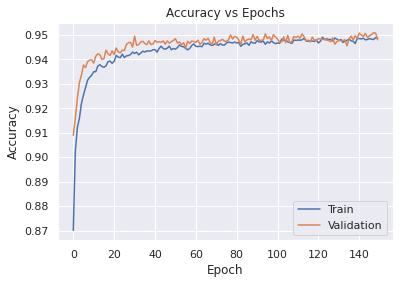

In [75]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [78]:
model_1.evaluate(X_test_normalized, y_test, verbose = 1)
test_pred = np.round(model_1.predict(X_test_normalized))

885/885 [==============================] - 1s 1ms/step


              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12787
           1       0.96      0.95      0.95     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



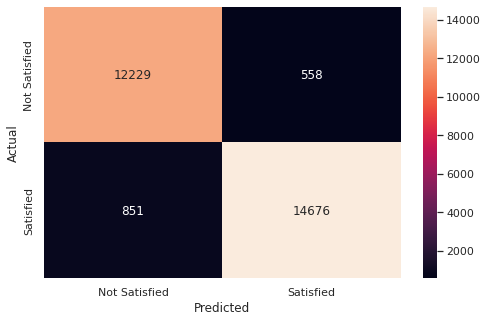

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Test on real model

In [112]:
data_test_final.head()

,ID,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Travel_Class_Business,Travel_Class_Eco,Seat_Class_Green Car,Seat_Class_Ordinary,Type_Travel_Business Travel,Type_Travel_Personal Travel
0,99900001,3,3,3,3,2,5,4,5,5,...,1,0,0,0,1,0,1,0,1,0
1,99900002,0,4,1,3,3,1,3,3,5,...,1,0,1,0,1,0,0,1,1,0
2,99900003,5,5,5,5,5,5,5,2,2,...,0,1,0,1,1,0,0,1,1,0
3,99900004,3,5,3,5,1,3,5,1,3,...,1,0,0,1,0,1,1,0,0,1
4,99900005,5,0,5,2,5,5,5,5,NaN,...,0,1,1,0,1,0,0,1,1,0


In [134]:
data_test_final_predicted = data_test_final.drop('ID',axis=1)
data_test_final_id = data_test_final['ID']

In [135]:
data_test_final_predicted

,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,...,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Travel_Class_Business,Travel_Class_Eco,Seat_Class_Green Car,Seat_Class_Ordinary,Type_Travel_Business Travel,Type_Travel_Personal Travel
0,3,3,3,3,2,5,4,5,5,5,...,1,0,0,1,1,0,1,0,1,0
1,0,4,1,3,3,1,3,3,5,3,...,1,0,1,0,1,0,0,1,1,0
2,5,5,5,5,5,5,5,2,2,2,...,0,1,0,1,1,0,0,1,1,0
3,3,5,3,5,1,3,5,1,3,2,...,1,0,0,1,0,1,1,0,0,1
4,5,0,5,2,5,5,5,5,4,3,...,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,2,5,2,3,3,2,3,3,4,5,...,0,1,0,1,0,1,1,0,0,1
35598,2,2,4,2,3,5,5,4,4,4,...,1,0,0,1,1,0,0,1,1,0
35599,4,0,4,2,2,4,1,2,1,3,...,0,1,1,0,0,1,1,0,1,0
35600,5,5,5,1,3,5,4,5,5,5,...,1,0,0,1,0,1,0,1,0,1


In [136]:
test_predicted = np.round(model_1.predict(scaler.transform(data_test_final_predicted)))

1113/1113 [==============================] - 1s 1ms/step


In [137]:
test_predicted

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [138]:
out1 = pd.DataFrame(test_predicted,columns=["Overall_Experience"])
out2 = pd.DataFrame(data_test_final_id,columns=['ID'])
out1.isnull().sum()

Overall_Experience    0
dtype: int64

In [139]:
submission = out2.merge(out1,right_index=True,left_index=True)

In [148]:
submission.reset_index(drop=True)

,ID,Overall_Experience
0,99900001,1.0
1,99900002,1.0
2,99900003,1.0
3,99900004,0.0
4,99900005,1.0
...,...,...
35597,99935598,0.0
35598,99935599,1.0
35599,99935600,0.0
35600,99935601,1.0


In [150]:
submission.to_csv('Submission.csv',index=None)

In [146]:
submission

,ID,Overall_Experience
0,99900001,1.0
1,99900002,1.0
2,99900003,1.0
3,99900004,0.0
4,99900005,1.0
...,...,...
35597,99935598,0.0
35598,99935599,1.0
35599,99935600,0.0
35600,99935601,1.0


# Train New Model

In [152]:
model_2 = Sequential()
model_2.add(Dense(256, activation='relu', input_shape=(28,)))
model_2.add(Dropout(0.3))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [154]:
model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               7424      
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)               

In [155]:
history_2 = model_2.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs=200, 
                    verbose=2)

Epoch 1/200
1859/1859 - 7s - loss: 0.2634 - accuracy: 0.8901 - val_loss: 0.2016 - val_accuracy: 0.9115 - 7s/epoch - 4ms/step
Epoch 2/200
1859/1859 - 5s - loss: 0.1936 - accuracy: 0.9187 - val_loss: 0.1591 - val_accuracy: 0.9325 - 5s/epoch - 3ms/step
Epoch 3/200
1859/1859 - 5s - loss: 0.1724 - accuracy: 0.9264 - val_loss: 0.1509 - val_accuracy: 0.9364 - 5s/epoch - 3ms/step
Epoch 4/200
1859/1859 - 5s - loss: 0.1555 - accuracy: 0.9336 - val_loss: 0.1384 - val_accuracy: 0.9392 - 5s/epoch - 3ms/step
Epoch 5/200
1859/1859 - 6s - loss: 0.1471 - accuracy: 0.9375 - val_loss: 0.1375 - val_accuracy: 0.9399 - 6s/epoch - 3ms/step
Epoch 6/200
1859/1859 - 6s - loss: 0.1418 - accuracy: 0.9398 - val_loss: 0.1355 - val_accuracy: 0.9413 - 6s/epoch - 3ms/step
Epoch 7/200
1859/1859 - 6s - loss: 0.1356 - accuracy: 0.9423 - val_loss: 0.1291 - val_accuracy: 0.9446 - 6s/epoch - 3ms/step
Epoch 8/200
1859/1859 - 9s - loss: 0.1346 - accuracy: 0.9434 - val_loss: 0.1250 - val_accuracy: 0.9469 - 9s/epoch - 5ms/step


In [156]:
model_2.evaluate(X_test_normalized, y_test, verbose = 1)
test_pred = np.round(model_2.predict(X_test_normalized))

885/885 [==============================] - 1s 1ms/step


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.97      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



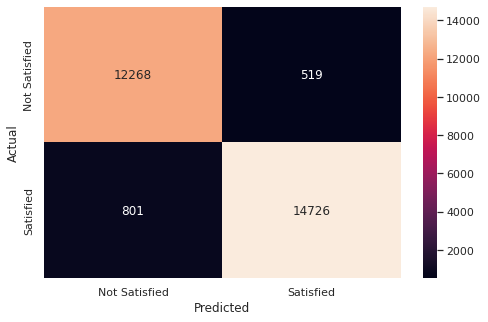

In [157]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [158]:
data_test_final_predicted = data_test_final.drop('ID',axis=1)
data_test_final_id = data_test_final['ID']
test_predicted = np.round(model_2.predict(scaler.transform(data_test_final_predicted)))
out1 = pd.DataFrame(test_predicted,columns=["Overall_Experience"])
out2 = pd.DataFrame(data_test_final_id,columns=['ID'])
submission2 = out2.merge(out1,right_index=True,left_index=True)
submission2.reset_index(drop=True)
submission2.to_csv('Submission2.csv',index=None)

1113/1113 [==============================] - 3s 2ms/step


In [161]:
model_3 = Sequential()
model_3.add(Dense(512, activation='tanh', input_shape=(28,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(256, activation='tanh'))
model_3.add(Dropout(0.2))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.2))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(16, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(8, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 512)               14848     
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)               

In [ ]:
history_3 = model_3.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs=200, 
                    verbose=2)

Epoch 1/200
1859/1859 - 12s - loss: 0.3072 - accuracy: 0.8758 - val_loss: 0.2319 - val_accuracy: 0.9060 - 12s/epoch - 6ms/step
Epoch 2/200
1859/1859 - 11s - loss: 0.2165 - accuracy: 0.9122 - val_loss: 0.1916 - val_accuracy: 0.9214 - 11s/epoch - 6ms/step
Epoch 3/200
1859/1859 - 11s - loss: 0.1897 - accuracy: 0.9217 - val_loss: 0.1630 - val_accuracy: 0.9304 - 11s/epoch - 6ms/step
Epoch 4/200
1859/1859 - 11s - loss: 0.1776 - accuracy: 0.9274 - val_loss: 0.1598 - val_accuracy: 0.9323 - 11s/epoch - 6ms/step
Epoch 5/200
1859/1859 - 11s - loss: 0.1696 - accuracy: 0.9295 - val_loss: 0.1600 - val_accuracy: 0.9337 - 11s/epoch - 6ms/step
Epoch 6/200
1859/1859 - 11s - loss: 0.1628 - accuracy: 0.9323 - val_loss: 0.1478 - val_accuracy: 0.9393 - 11s/epoch - 6ms/step
Epoch 7/200
1859/1859 - 12s - loss: 0.1589 - accuracy: 0.9334 - val_loss: 0.1461 - val_accuracy: 0.9366 - 12s/epoch - 6ms/step
Epoch 8/200
1859/1859 - 11s - loss: 0.1576 - accuracy: 0.9356 - val_loss: 0.1467 - val_accuracy: 0.9372 - 11s/e